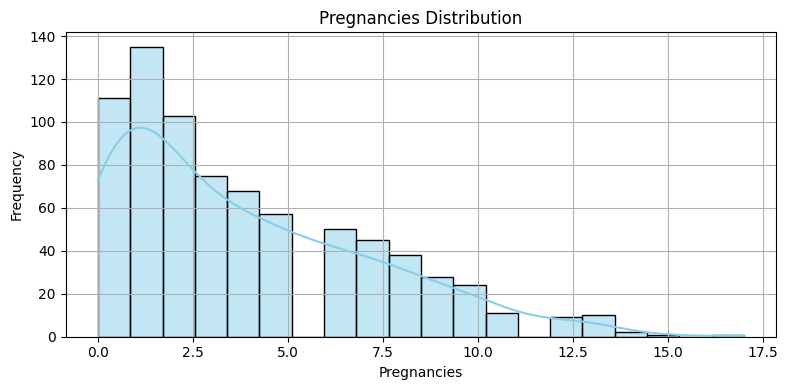

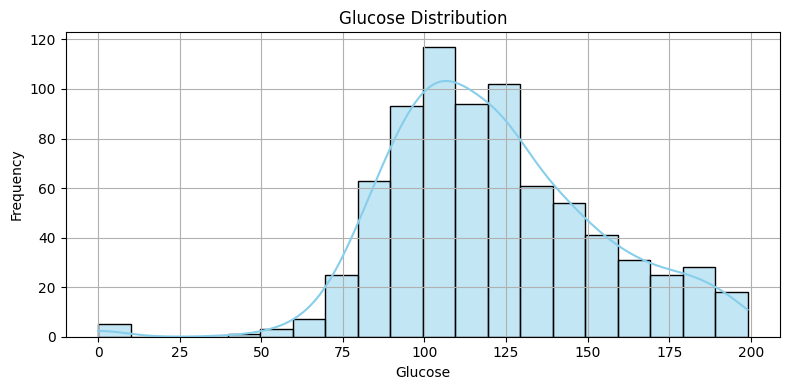

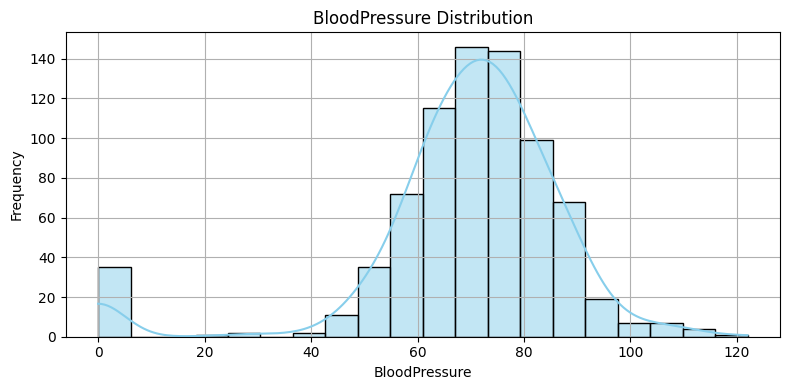

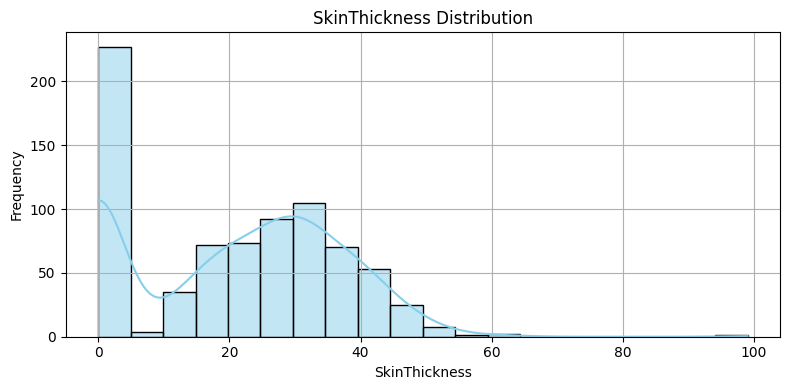

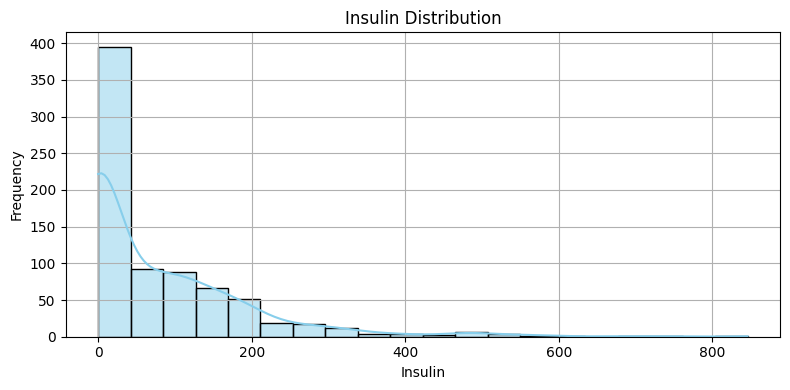

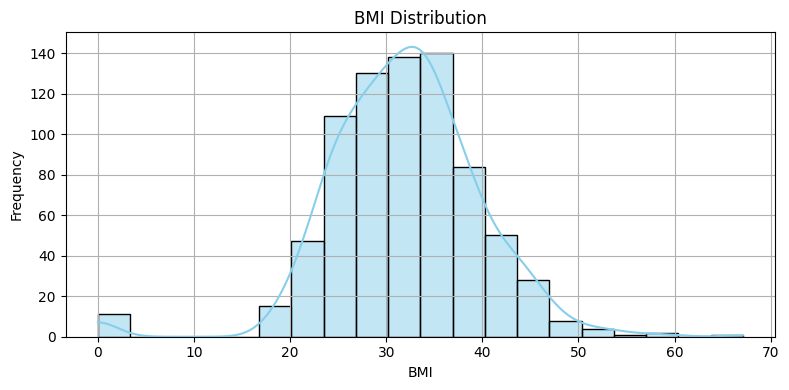

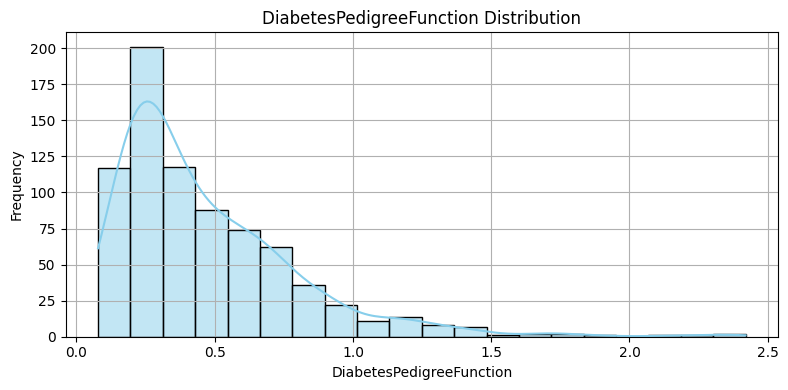

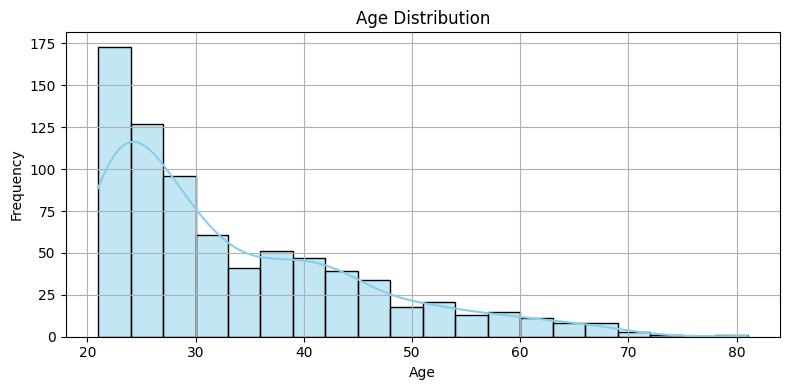

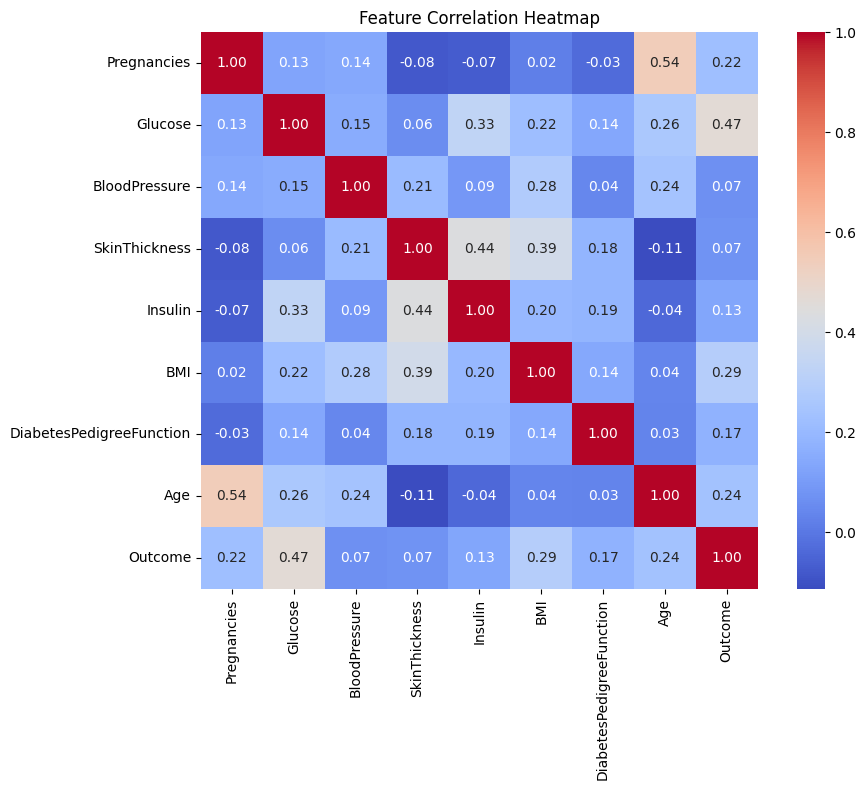

✅ Model Accuracy: 0.72
⏱ Training time: 0.2410 seconds
⏱ Prediction time: 0.0106 seconds

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



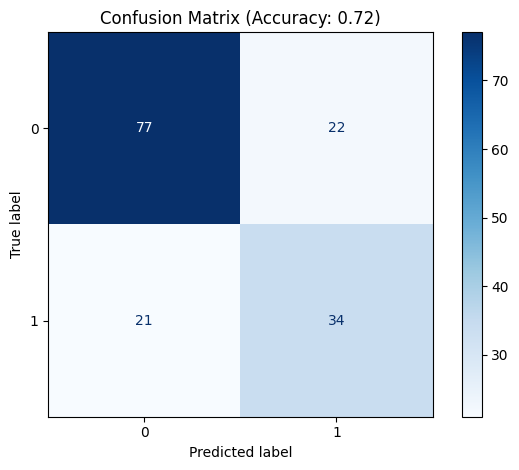

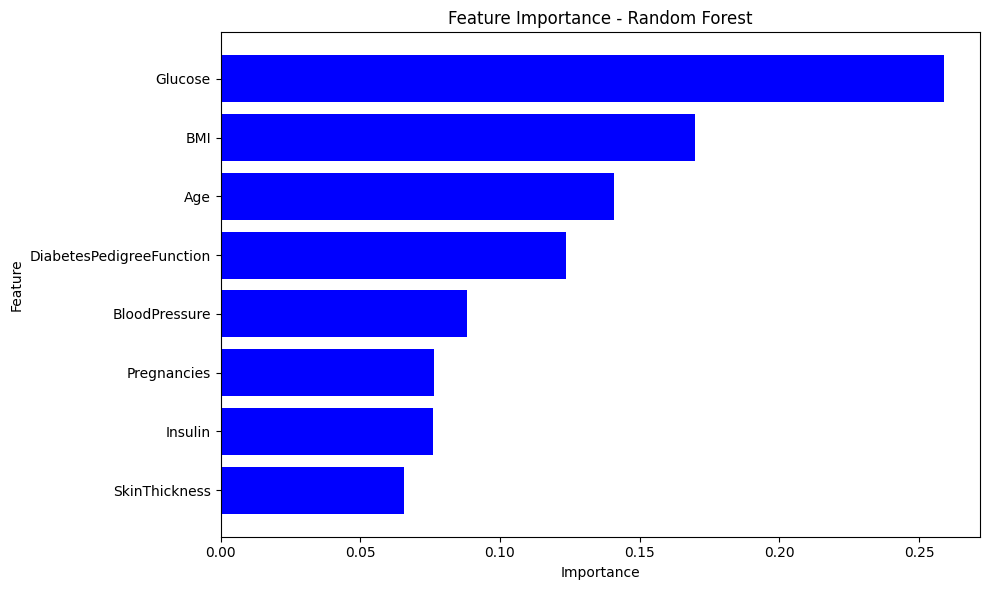

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import time

# Load dataset
df = pd.read_csv('diabetes_new.csv')

# === EDA: Distribution Plots for each feature ===
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.remove('Outcome')  # Exclude target column

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === EDA: Correlation Heatmap ===
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# === Model Training ===
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_train = time.time()
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

# === Evaluation ===
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"✅ Model Accuracy: {accuracy:.2f}")
print(f"⏱ Training time: {end_train - start_train:.4f} seconds")
print(f"⏱ Prediction time: {end_pred - start_pred:.4f} seconds")
print("\n📄 Classification Report:")
print(report)

# === Confusion Matrix Plot ===
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.grid(False)
plt.tight_layout()
plt.show()

# === Feature Importance - Horizontal Bar Chart ===
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=True)  # For horizontal chart

plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='blue')  # Horizontal bars
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()